In [70]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdmolops import SanitizeFlags
import numpy as np

# RDKit visualisation and descriptors

In this section of the project, you'll look at using RDKit.

1. Visualising molecules using rdkit
2. Gathering descriptors
3. Gathering Fingerprints - optional/later work

RDKit is an open source tool used for cheminformatics ("he use of computer and informational techniques applied to a range of problems in the field of chemistry").

We can take any molecule, and perform a variety of functions in order to obtain more information. This information can be used as input to any modelling approaches.

## Molecule identifiers

A molecule is human interpretable by its chemical structure, e.g. for water - H2O, and so can be used as an identifier. However, 
this gives very little information regarding any stereochemistry etc.

Other identifiers are available, with the ability to give further information about the molecule.

Two main identifiers are SMILEs and InChis.

1. [SMILEs](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) - Simplified molecular-input line-entry system. A notation used to describe the chemical species using short ASCII strings.
2. [InChi](https://jcheminf.springeropen.com/articles/10.1186/s13321-015-0068-4) - an open project for chemical identifiers, e.g. InChI=1/C5H5N5O/c6-5-9-3-2(4(11)10-5)7-1-8-3/h1H,(H4,6,7,8,9,10,11)/f/h8,10H,6H2. It has a layered structure which allows representation of a molecular structure with a desired level of detail.
    - The InChiKey is a short fixed-length character signature based on a hash code of the InChi string, e.g. InChIKey=UYTPUPDQBNUYGX-GSQBSFCVNA-N

"Like InChI, the SMILES language allows a canonical serialization of molecular structure. However, SMILES is proprietary and unlike InChI is not an open project. This has led to the use of different generation algorithms, and thus, different SMILES versions of the same compound have been found." [here](https://www.inchi-trust.org/technical-faq/#2.10)

For example caffeine smiles:
    1. [c]1([n+]([CH3])[c]([c]2([c]([n+]1[CH3])[n][cH][n+]2[CH3]))[O-])[O-]
    2. CN1C(=O)N(C)C(=O)C(N(C)C=N2)=C12
    3. Cn1cnc2n(C)c(=O)n(C)c(=O)c12
    4. Cn1cnc2c1c(=O)n(C)c(=O)n2C
    5. O=C1C2=C(N=CN2C)N(C(=O)N1C)C
    6. CN1C=NC2=C1C(=O)N(C)C(=O)N2C
    
whereas, there would only be one InChI:

    InChI:1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3 

Tautomer information can be indicated according to the respective layer.

Our data you will have seen comes with the SMILEs identifiers, so without any other information we will proceed with these.
It is important to ensure that each entry has a unique SMILEs, as these will be used to generate input. You will have already looked at this in 'LoadingData.ipynb' for the training and first test set.

In [71]:
import pandas as pd

In [96]:
train = pd.read_csv("../data/train.csv", index_col=0)
test1 = pd.read_csv("../data/test1.csv", index_col=0)
test2 = pd.read_csv("../data/test2.csv", index_col=0)
print(len(train))
print(len(test1))
print(len(test2))
train.head()

868
413
21


,CAS_Number,Name,Log S,Smiles
1082,6032-29-7,2-pentanol,-0.29,CCCC(O)C
957,13993-65-2,Metiazinic_Acid,-3.94,c1ccc2Sc3ccc(CC(=O)O)cc3N(C)c2c1
844,94-74-6,(4-Chloro-2-methylphenoxy)acetic_Acid,-2.23,O=C(O)COc(c(cc(c1)Cl)C)c1
41,105-05-5,"1,4-diethylbenzene",-3.75,c1cc(CC)ccc1CC
144,1024-57-3,heptachlor_epoxide,-6.29,ClC2C1OC1C3C2C4(Cl)C(=C(Cl)C3(Cl)C4(Cl)Cl)Cl


In [97]:
test1.head()

,CAS_Number,Name,Log S,Smiles
1198,97-23-4,dichlorphen,-3.95,Oc(c(cc(c1)Cl)Cc(c(O)ccc2Cl)c2)c1
140,20244-70-6,"1,2-diiodoethylene",-3.22,IC=CI
117,96-18-4,"1,2,3-trichloropropane",-1.92,ClCC(Cl)CCl
1215,626-64-2,4-Hydroxypyridine,1.02,n1ccc(O)cc1
937,53-19-0,"o,p'-DDD",-6.51,ClC(Cl)C(c1ccc(Cl)cc1)c2ccccc2Cl


In [98]:
test2.head()

,CAS_Num,Name,Log S,Smiles
0,37680-73-2,"2,2´,4,5,5´-PCB",-7.89,Clc1ccc(Cl)c(c1)c2cc(Cl)c(Cl)cc2Cl
1,94-09-7,benzocaine,-2.32,O=C(OCC)c(ccc(N)c1)c1
2,50-78-2,acetylsalicylic_acid,-1.72,O=C(Oc(c(ccc1)C(=O)O)c1)C
3,58-55-9,theophylline,-1.39,CN1C(=O)N(C)c2ncnc2C1(=O)
4,60-80-0,antipyrine,-0.56,c1ccccc1N2C(=O)C=C(C)N2C


Test set #2 contains 20 compounds, but we have not yet checked for unique smiles. 
Using your knowledge so far, identify and remove any non-unique molecules (there may not be any!).

If you make any changes, make sure to save to a uniquely named .csv file for future reference.

In [99]:
#work here 


Before we can do anything in RDKit we need to 'sanitize' the molecule. This means converting the identifier to an RDKit molecule type.

We can write a function to do this:
    
    def getMolecule(smiles):
        """Returns an rdkit molecule, arguments: smiles - smiles identifier for the molecule"""
        if pd.notnull(smiles):
            mol = Chem.MolFromSmiles(smiles, sanitize=False)
            if pd.notnull(mol):
                error = Chem.SanitizeMol(mol, catchErrors=True)
                if Chem.SANITIZE_NONE == error:
                    return mol
                else:
                    return None

                
Can you work out what each line is doing?
Write it below in a new cell and write a comment at the end of each line.            

Bonus question: What Chem function could we use to get the molecule from an inchi?

In [ ]:
#work here


We can use pandas to process our data row by row, and direct it to the function.

    data["Smiles"].apply(getMolecule)
    
We can save the results to a new column:

    data["Mol"] = data["Smiles"].apply(getMolecule)
    
Do this for train, test1 and test2.

In [100]:
#work here

Finally, we need to remove any molecules that did not sanitize correctly, and so their 'Mol' is equal to None.

    new_data = data[data["Mol"] != None]
    
Again, do this for train, test1 and test2, naming them new_train, new_test1 and new_test2.

How many molecules for each were removed as a result?

In [102]:
#work here

855
405
20


We will need to save these dataframes for use in modelling.

In [123]:
new_train.to_csv("../data/train_nonull.csv")
#Repeat for both the test1 and test2 sets.

## Descriptors

There are a variety of descriptors, http://www.rdkit.org/Python_Docs/rdkit.Chem.Descriptors-module.html, available in RDkit that can be used to give information about the molecule.

Descriptors may be discrete, e.g. NumValenceElectrons, or continuous e.g. BalabanJ - calculating a J value for the molecule.

If you wish to find out more about each descriptor, follow the link above.

In [105]:
from rdkit.Chem import Descriptors

We can use a built-in function 'dir', which returns the list of attributes for an object.

    dir(Descriptors)
    
However, there are some that are background functions, typically prepended with '_' or do return values.

We can perform list comprehension to gather the right descriptors.

We also check that the descriptor's attribute is callable.

In [106]:
descriptors = [d for d in dir(Descriptors) if callable(getattr(Descriptors, d)) and not d in [
    '_isCallable','_setupDescriptors','_ChargeDescriptors','_test',
    '_FingerprintDensity','_runDoctests','PropertyFunctor',
    #the following can return null values
    'MaxAbsPartialCharge','MaxPartialCharge','MinAbsPartialCharge','MinPartialCharge'
]]

In [56]:
descriptors

['BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA11',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'EState_VSA9',
 'ExactMolWt',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'FractionCSP3',
 'HallKierAlpha',
 'HeavyAtomCount',
 'HeavyAtomMolWt',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'MolLogP',
 'MolMR',
 'MolWt',
 'NHOHCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRadicalElectrons',
 'NumRotatableBonds',
 'NumSaturatedCarbocycles',
 'NumSaturatedHeterocycles',
 'NumSaturatedRings',
 

### Gathering descriptors

As an example, we shall calculate the 'qed' - a druglikeness score for the first rdkit molecule listed in the training set (new_train).

We use .iloc[0] to return the very first locational index.

We then use 

    getattr(Descriptors, 'qed')
    
to return the function for calculating qed.

If we pass our molecule as an argument to this function, we can return the qed value.

    getattr(Descriptors, 'qed')(mol)
    
What is the qed score of the first molecule?

In [124]:
#work here 
mol = None #replace None with a reference to the correct molecule
None #replace None with the getattr line.

Write a function, that takes a descriptor and molecule as an argument and returns the corresponding descriptor value.

In [82]:
#work here

0.536831757483578


As we have multiple descriptors, and multiple molecules, we can make this simpler by wrapping it into an anonymous function.

    lambda m: getattr(Descriptors, desc)(m)
    
We can then use the map function, which applies to the function to every single item in a list.

    map(lambda m: getattr(Descriptors, desc)(m), molecules)
    
We'll put this latter line into a callable function, so we can apply it to multiple descriptors.

Unfortuantely, this returns a map, so we need to convert it to a list.


    list(map(..))

In [83]:
def getDescriptorValues(desc, molecules):
    return list(map(lambda m: getattr(Descriptors, desc)(m), molecules))

molecules = new_train["Mol"].values
getDescriptorValues('qed', molecules)

[0.536831757483578,
 0.9065524833449558,
 0.8131158175997406,
 0.5831204703949601,
 0.44054976114239786,
 0.5116862498477169,
 0.3912258247330487,
 0.5496400415990373,
 0.35850815039012257,
 0.595730956091163,
 0.4786228959968398,
 0.7871395577774678,
 0.6589511753025439,
 0.35180438170232986,
 0.5059504568728941,
 0.6533118700090956,
 0.4197132452520627,
 0.6923332593166821,
 0.11306379404457513,
 0.4933927122974484,
 0.6591620960204869,
 0.7683684755629444,
 0.45063884227737705,
 0.47275172477649213,
 0.4274047163232894,
 0.5586305568134092,
 0.4388711477830505,
 0.5667995799649952,
 0.5403341220433435,
 0.2894274347351113,
 0.4219958386868299,
 0.49138777691763613,
 0.6810921785688575,
 0.6489454818006694,
 0.6889877978543473,
 0.771363830095823,
 0.5164411302422238,
 0.5829747349344339,
 0.6869443648513704,
 0.3967776605314054,
 0.38922809246015416,
 0.45238899922350456,
 0.7232557974689342,
 0.21795769075719063,
 0.771363830095823,
 0.8519226837244681,
 0.7411668203155193,
 0.3852

You'll see it now returns a list of values! Wrap this up into a for loop iterating through each descriptor, and we're ready to start modelling with the data!

    x = pd.DataFrame() #initialise a new empty dataframe
    for d in descriptors:
        x[d] = ...
    
Replace ... with the correct code!

In [125]:
#work here

----------------------------------
### Xylene - an example

To demonstrate some of these descriptors, we'll use [xylene](https://en.wikipedia.org/wiki/Xylene), an important petrochemical compound. There are different tautomers according to where to methyl (CH3) groups are located.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/IUPAC-cyclic.svg/446px-IUPAC-cyclic.svg.png"></img>

The image above shows three different tautomers for xylene, which are represented by different SMILEs:
- Cc1c(C)cccc1
- Cc1cc(C)ccc1
- Cc1ccc(C)cc1

I have placed these into a list, and used our getMolecule function to generate the rdkit molecule in a list comprehension.

In [61]:
xylene_smiles = ["Cc1c(C)cccc1","Cc1cc(C)ccc1","Cc1ccc(C)cc1"]
xylene_mols = [getMolecule(i) for i in xylene_smiles]
xylene_mols

You can draw molecules in RDkit using:
    
    rdkit.Chem.Draw.MolToImage()
    
and can draw [multiple molecules](http://www.rdkit.org/Python_Docs/rdkit.Chem.Draw-module.html#_MolsToGridImage) using:
    
    rdkit.Chem.Draw.MolsToGridImage()
    
As we have already imported the Draw module in the first cell of this notebook, we can just call 'Draw'.

Draw all three tautomers of xylene using MolsToGridImage, can you identify them from the image above?


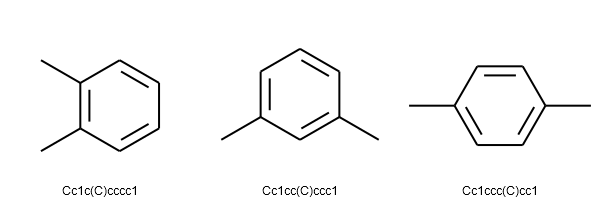

In [62]:
Draw.MolsToGridImage(xylene_mols, legends=xylene_smiles)

We can see that xylene is [aromatic](https://en.wikipedia.org/wiki/Aromaticity), due to the presence of at least one benzene ring.

One of the descriptors is 'RingCount'. 
1. Looking at the drawings of the molecules, how many aromatic rings does each of the xylene molecules have? 
2. Use your getDescriptorValues() function to get 'RingCount' values for all the xylene_mols. Does this agree with your answer above?

There is also a 'NumAromaticRings' descriptor. RDKit has a few descriptors that mean the same thing! 

In [ ]:
#work here


A carbon atom that bonds to four other atoms is defined as sp3 [hybridised](http://faculty.otterbein.edu/DJohnston/chem220/tutorial1/carbon.html) (it needs 4 orbitals to form the bonds). Whilst a carbon that bonds to only three other atoms is considered sp2 hybridised (it needs 3 orbitals to form the bonds).

Unfortunately, in the representation of the structures above, there are no hydrogens shown, so we must infer them.

Looking at the first xylene structure:

1. How many sp2 hybridised carbon atoms are there? (Bonded to three atoms).
2. How many sp3 hybridised carbon atoms are there? (Bonded to four atoms).


In [ ]:
#work here
sp2_c = None #replace None with your answer
sp3_c = None #replace None with your answer

What fraction of the carbon atoms is therefore sp3 hybridised?

In [ ]:
sp3_c / (sp3_c+sp2_c)

We can avoid this entire calculation using the descriptor 'FractionCSP3'!

In [ ]:
getDescriptorValues('FractionCSP3',xylene_mols)

------------------------------------------------

### Back to our data

Because we've got multiple datasets, its best to wrap getDescriptorValues into a function that will return a dataframe containing values for all descriptors.

    def makeDescTable(descriptors, molecules):
        """Returns a pandas table of values for all descriptors"""
        x = pd.DataFrame()
        for d in descriptors:
            x[d] = ...
        return x

In [107]:
def makeDescTable(descriptors, molecules):
    x = pd.DataFrame()
    for d in descriptors:
        x[d] = getDescriptorValues(d, molecules)
    return x

In [109]:
new_train_desc = makeDescTable(descriptors, new_train["Mol"].values)
print(len(new_train_desc))

855


In [110]:
new_train_desc.head()

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,2.627215,25.119415,4.991564,4.438777,4.438777,2.770056,2.450904,2.450904,1.637697,1.637697,...,0,0,0,0,0,0,0,0,0,0.536832
1,2.034853,654.343876,13.405413,10.459482,11.275979,9.147867,6.002897,6.819394,4.501396,5.585173,...,0,0,0,0,0,0,0,0,0,0.906552
2,2.719442,322.635895,9.844935,7.080832,7.836761,6.092224,3.701100,4.079064,2.592233,3.028668,...,0,0,0,0,0,0,0,0,0,0.813116
3,2.797251,160.698213,7.397341,6.723615,6.723615,4.863703,3.942688,3.942688,2.523603,2.523603,...,0,0,0,0,0,0,0,0,0,0.583120
4,2.010495,476.454663,13.248559,8.440751,13.732254,8.203248,5.317533,8.021755,5.187197,8.966801,...,0,0,0,0,0,0,0,0,0,0.440550


You should be seeing a 196 column pandas dataframe, with all the corresponding values and descriptors.
Each row is a molecule.

Perform this for test1 and test2,

Then save each descriptor dataframe to a csv file with a relevant name.

    new_train_desc.to_csv("../train_desc.csv")

In [126]:
#work here 

## Fingerprints

Molecules can also be represented by fingerprints, which are bit vector representations of the molecule.

These are not human readable, but can be used as input for neural network modelling attempts.

If you get to the end of this series of work, this is available as an extra option.

There are [multiple fingerprints](http://www.rdkit.org/Python_Docs/rdkit.Chem.rdMolDescriptors-module.html) available, with lots of different parameters you can play with, but for demonstration, we'll use the defaults.

In [112]:
from rdkit.Chem import rdMolDescriptors

fp = lambda m: rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(m)

In [113]:
fingerprints = new_train["Mol"].apply(fp)
fingerprints

1082    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
957     [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
844     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
41      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
144     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
303     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
345     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
101     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
370     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
40      [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
619     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1239    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
179     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
26      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1246    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
702     [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
134     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
701     [0, 0,

You'll see the fingerprints are still connected to an index, so we'll convert it into a list.

They are also of the type ExplicitBitVect, so to make them slightly more readable we'll map them to an array.
Remember it returns a map object, so we'll convert it to a list

    list(map(np.array, fingerprints))
    
If we look at the output, it's still not very nice, so we'll wrap that in another np.array.

In [114]:
train_fp = np.array(list(map(np.array, fingerprints)))

Let's look at the first 20 bits for the first molecule.

It's a binary bit vector, so values will only be 1 or 0.

In [115]:
print(train_fp[0][0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


As this isn't a dataframe we can't use our trusty

    data.to_csv()

function, so we'll create a pickle dump instead.

    import pickle
    pickle.dump(train_fp, open("train_fp.p", "wb"))


In [116]:
import pickle
pickle.dump(train_fp, open("../data/train_fp.p", "wb"))

If we ever want to load this again:
    
    import pickle
    train_fp = pickle.load(open("train_fp.p","rb"))

Save the fingerprints for test1 and test2 too!

In [127]:
#work here 